In [2]:
# %% Imports
from jax import numpy as jnp, random
from modax.data.burgers import burgers# imports
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted
import os
import jax
from jax import numpy as jnp, random
from modax.data.burgers import burgers

jax.config.update('jax_platform_name', 'cpu') # to fix weird memory bug

In [12]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches
font_size = 8
plt.rcParams.update({'font.size': font_size})
%config InlineBackend.figure_format = 'svg'



# Single run plot

In [3]:
#loading noise dataframes
df_noise = []
for file in natsorted(filter(lambda x: x.find('noise') != -1, os.listdir('runs/'))):
    path = os.path.join('runs/', file)
    df_noise.append(load_tensorboard(path))
    
#loading sparsity dataframes
df_nx = []
for file in natsorted(filter(lambda x: x.find('nx') != -1, os.listdir('runs/'))):
    path = os.path.join('runs/', file)
    df_nx.append(load_tensorboard(path))

In [4]:
prior_keys = natsorted(filter(lambda key: key.find('alpha') == 0, df_noise[0].keys()))
final_prior_noise = np.stack([df[prior_keys].iloc[-1] for df in df_noise], axis=0)
final_prior_nx = np.stack([df[prior_keys].iloc[-1] for df in df_nx], axis=0)

In [5]:
# Making data
x = jnp.linspace(-3, 4, 50)
t = jnp.linspace(0.5, 5.0, 20)
t_grid, x_grid = jnp.meshgrid(t, x, indexing="ij")
u = burgers(x_grid, t_grid, 0.1, 1.0)

In [6]:
# settings
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-paper')
col_width = 5.5 # neurips style column width in inches
plt.rcParams.update({'font.size': 7})
label_size = 8

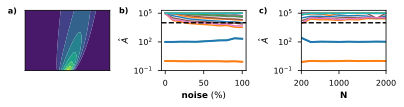

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(1.0 * col_width, 0.25 * col_width))
gs = GridSpec(3, 3, figure=fig)

ax = fig.add_subplot(gs[:, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-10, 18, 'a)', fontdict={'weight':'bold', 'size': label_size})

ax = fig.add_subplot(gs[:, 1])
ax.plot(np.arange(0, 101, 10), final_prior_noise)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 2], lw=2)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 6], lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xlabel(r'$\mathbf{noise}$ (%)')
ax.set_ylabel(r'$\hat{A}$')
ax.set_ylim([1e-1, 2e5])
ax.set_xticks([0, 50, 100])
ax.set_xticklabels([0, 50, 100])
ax.text(-60, 1e5, 'b)', fontdict={'weight':'bold', 'size': label_size})

ax = fig.add_subplot(gs[:, 2])
ax.plot(np.arange(10, 101, 10), final_prior_nx)
ax.plot(np.arange(10, 101, 10), final_prior_nx[:, 2], lw=2)
ax.plot(np.arange(10, 101, 10), final_prior_nx[:, 6], lw=2)
ax.axhline(1e4, color='k', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel(r'$n_x$')
ax.set_ylim([1e-1, 2e5])
ax.set_ylabel(r'$\hat{A}$')
ax.set_xlim([10, 100])
ax.set_xticks([10, 50, 100])
ax.set_xticklabels([200, 1000, 2000])

ax.text(-35, 1e5, 'c)', fontdict={'weight':'bold', 'size': label_size})
ax.set_xlabel(r'$\mathbf{N}$')

plt.savefig('sbl_experiments.pdf', bbox_inches='tight', pad_inches=0.0)

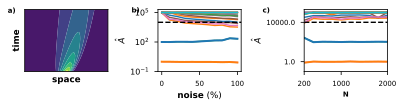

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(1.0 * col_width, 0.25 * col_width))
gs = GridSpec(3, 3, figure=fig)

ax = fig.add_subplot(gs[:, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-10, 18, 'a)', fontdict={'weight':'bold', 'size': label_size})
ax.set_xlabel("space", fontdict={'weight':'bold'})
ax.set_ylabel("time", fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:, 1])
ax.plot(np.arange(0, 101, 10), final_prior_noise)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 2], lw=2)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 6], lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xlabel(r'$\mathbf{noise}$ (%)')
ax.set_ylabel(r'$\hat{A}$')
ax.set_ylim([1e-1, 2e5])
ax.set_xticks([0, 50, 100])
ax.set_xticklabels([0, 50, 100], fontdict={'size': 7})
ax.text(-40, 1e5, 'b)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:, 2])
ax.plot(np.arange(10, 101, 10), final_prior_nx)
ax.plot(np.arange(10, 101, 10), final_prior_nx[:, 2], lw=2)
ax.plot(np.arange(10, 101, 10), final_prior_nx[:, 6], lw=2)
ax.axhline(1e4, color='k', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel(r'$n_x$')
ax.set_ylim([1e-1, 2e5])
ax.set_ylabel(r'$\hat{A}$')
ax.set_xlim([10, 100])
ax.set_xticks([10, 50, 100])
ax.set_xticklabels([200, 1000, 2000], fontdict={'size': 7})

ax.set_yticks([10e-1, 10e3])
ax.set_yticklabels([10e-1, 10e3], fontdict={'size': 7})

ax.text(-35, 1e5, 'c)', fontdict={'weight':'bold'})
ax.set_xlabel(r'$\mathbf{N}$', fontdict={'size': 7})

plt.savefig('sbl_experiments.pdf', bbox_inches='tight', pad_inches=0.0)

Text(0.5, 0, '$\\mathbf{N}$')

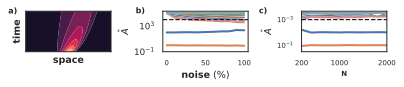

In [27]:
fig = plt.figure(constrained_layout=True, figsize=(1.0 * col_width, 0.2 * col_width))
gs = GridSpec(3, 3, figure=fig)

ax = fig.add_subplot(gs[:, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-10, 18, 'a)', fontdict={'weight':'bold'})
ax.set_xlabel("space", fontdict={'weight':'bold'})
ax.set_ylabel("time", fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:, 1])
ax.plot(np.arange(0, 101, 10), final_prior_noise)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 2], lw=2)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 6], lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xlabel(r'$\mathbf{noise}$ (%)')
ax.set_ylabel(r'$\hat{A}$')
ax.set_ylim([1e-1, 2e5])
ax.set_xticks([0, 50, 100])
ax.set_xticklabels([0, 50, 100], fontdict={'size': 7})
ax.text(-40, 1e5, 'b)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:, 2])
ax.plot(np.arange(10, 101, 10), final_prior_nx)
ax.plot(np.arange(10, 101, 10), final_prior_nx[:, 2], lw=2)
ax.plot(np.arange(10, 101, 10), final_prior_nx[:, 6], lw=2)
ax.axhline(1e4, color='k', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel(r'$n_x$')
ax.set_ylim([1e-1, 2e5])
ax.set_ylabel(r'$\hat{A}$')
ax.set_xlim([10, 100])
ax.set_xticks([10, 50, 100])
ax.set_xticklabels([200, 1000, 2000], fontdict={'size': 7})

ax.set_yticks([10e-1, 10e3])
ax.set_yticklabels([r'$10^{-1}$', r'$10^{-3}$'], fontdict={'size': 7})

ax.text(-35, 1e5, 'c)', fontdict={'weight':'bold'})
ax.set_xlabel(r'$\mathbf{N}$', fontdict={'size': 7})

#plt.savefig('sbl_experiments.pdf', bbox_inches='tight', pad_inches=0.0)

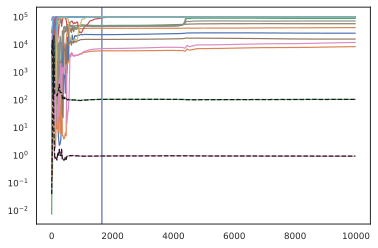

In [17]:
idx = 3
plt.axvline(df_noise[idx].BIC.idxmin())
plt.semilogy(df_noise[idx][prior_keys])
plt.semilogy(df_noise[idx][prior_keys[2]], 'k--')
plt.semilogy(df_noise[idx][prior_keys[6]], 'k--')

In [8]:
prior_keys = natsorted(filter(lambda key: key.find('alpha') == 0, df_noise[0].keys()))


final_prior_noise = np.stack([df[prior_keys].loc[-1] for df in df_noise], axis=0)
final_prior_nx = np.stack([df[prior_keys].loc[-1] for df in df_nx], axis=0)

final_prior_noise = np.stack([df[prior_keys].iloc[-1] for df in df_noise], axis=0)
final_prior_nx = np.stack([df[prior_keys].iloc[-1] for df in df_nx], axis=0)

KeyError: -1